# Simple Linear Regression Model

### Source of data: use same random number

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [222]:
m = 30 # number of observation
X = np.linspace(start=1, stop=10, num=m).reshape(-1,1) # features or X

# create an array containing only "1"
ones = np.ones([X.shape[0], 1])

#cocatenate the ones to X matrix
# h(theta) = theta_0 * x_0 + theta_1 * x_1 where x_0 one vector
X_mod = np.concatenate([ones, X], 1)

Y = np.add(np.random.rand(m,1)*5, 2 * X).reshape(-1,1)
print(X_mod.shape)
print(Y.shape)

(30, 2)
(30, 1)


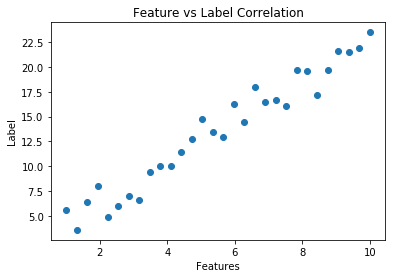

In [223]:
# plot the data
plt.scatter(X, Y)
plt.xlabel('Features')
plt.ylabel('Label')
plt.title('Feature vs Label Correlation')
plt.show()

Define cost function which is the Least Square Error

In [224]:
def compute_cost(X, Y, theta):
    inner = np.power(np.matmul(X, theta.T) - Y, 2)
    return np.sum(inner) / (2 * len(X))

Define the gradient descent algorithm

In [225]:
def gradient_descent(X, Y, theta, alpha, epochs):
    
    costs = []
    for i in range(epochs):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - Y) * X, axis=0)
        cost = compute_cost(X, Y, theta)
        costs.append([i, cost])
#         if i % 10 == 0:
#             print('theta: ', theta)
#             print('cost: ', cost)

    return (theta, cost, costs)

In [241]:
# Execute the gradient descent algorithm
# theta is a row vector
theta = np.array([[0.0, 0.0]])
alpha = 0.001
epochs = 100
g, cost, costs = gradient_descent(X_mod, Y, theta, alpha, epochs)
print('Final result')
print(g)
print(cost)

Final result
[[0.3685438  2.28364138]]
1.0739388913174193


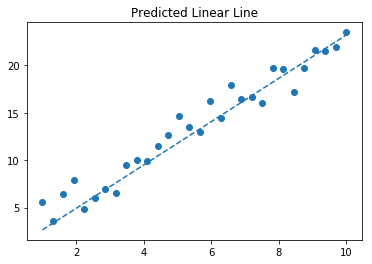

In [242]:
# final plot
plt.scatter(X[:, 0].reshape(-1,1), Y)
predicted_y = g[0][0] + g[0][1] * X
plt.plot(X, predicted_y, '--')
plt.title('Predicted Linear Line')
plt.show()

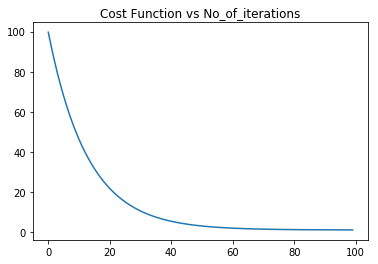

In [243]:
# list into numpy array
costs = np.asarray(costs)

# plot cost function vs no. of iterations
plt.plot(costs[:,0], costs[:,1], '-')
plt.title('Cost Function vs No_of_iterations')
plt.show()


Reindexing is a great way to shuffle (randomize) a DataFrame. In the example below, we take the index, which is array-like, and pass it to NumPy's random.permutation function, which shuffles its values in place. Calling reindex with this shuffled array causes the DataFrame rows to be shuffled in the same way. Try running the following cell multiple times!

df.reindex(np.random.permutation(df.index))

Source of data: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html This notebook will use Gradient Descent Algorithm to find the minimum cost/loss function. Minimum cost function helps to set the parameter \theta for linear regression hypothesis function

### Analysis the source data

In [44]:
cricket_chimps_temp_df = pd.read_csv('/Users/kamal/GoogleDrive/Machine_Learning_Practice_Python/Machine_Learning_Practice_Python/data/cricket_chimps_temp.csv')

In [ ]:
cricket_chimps_temp_df.head()

In [ ]:
cricket_chimps_temp_df.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a13eba8>]],
      dtype=object)

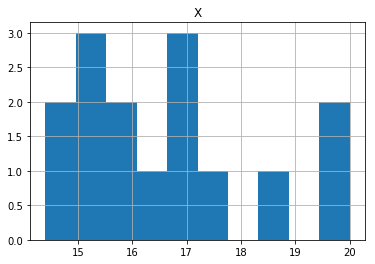

In [95]:
cricket_chimps_temp_df.hist('X')

In [ ]:
cricket_chimps_temp_df

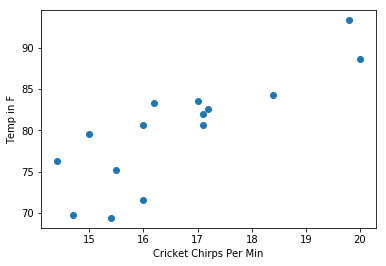

In [50]:
# plot the data
X = cricket_chimps_temp_df['X'].values
y = cricket_chimps_temp_df['Y'].values
plt.scatter(X, y)
plt.xlabel('Cricket Chirps Per Min')
plt.ylabel('Temp in F')
plt.show()

**The above plot shows positive correlation of Cricket (insect) chirps with temperature**

## Use Gradient Descent Algorithm

In [89]:
theta_0 = 0
theta_1 = 0
feature = X
actual_label = y
alpha = 0.001 # hyperparameter learning rate
no_obs = len(X)
epoch = 1

while epoch < 1000:
    sum_theta_0 = theta_0 + theta_1 * feature - actual_label
    sum_theta_1 = (theta_0 + theta_1 * feature - actual_label) * feature
    
    temp_0 = theta_0 - alpha * 1/no_obs * sum_theta_0
    temp_1 = theta_1 - alpha * 1/no_obs * sum_theta_1
    
#     if abs(temp_0 - theta_0) < 0.001:
#         break;
    
    theta_0 = temp_0
    theta_1 = temp_1
    
    epoch += 1

In [ ]:
print(theta_0, theta_1)
print(theta_0.shape)

In [37]:
def predicted_label(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

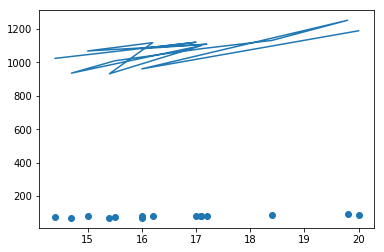

In [39]:
# plot the data based on new predicted value
X = cricket_chimps_temp_df['X'].values
y = cricket_chimps_temp_df['Y'].values
plt.scatter(X, y)
plt.plot(X, predicted_label(theta_0, theta_1, y))
plt.show()

## Simple Linear Regression using Scikit Learn - Popular opensourced ML Framework

In [54]:
from sklearn.linear_model import LinearRegression

In [76]:
# reshape the one feature into column-wise
X = X.T

reg = LinearRegression()
reg.fit(X, y)

reg.score(X, y)

0.69746514501674

In [80]:
predicted_label = reg.predict(np.array([[20.000]]))
predicted_label

array([91.05419634])

In [82]:
# Estimated coefficients for the linear regression problem
reg.coef_

array([3.29109457])

## Simple Linear Regression using Tensorflow

In [84]:
import tensorflow as tf

In [ ]:
classifier = tf.estimator.LinearRegressor()